In [18]:
import pandas as pd
import numpy as np
import seaborn as sns#for plot
import matplotlib.pyplot as plt#for plot
get_ipython().run_line_magic('matplotlib','inline')#to get image in jupyter

In [19]:
#we use UCI machine leaening resposiratory
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=["sepal_length","sepal_width","petal_length","petal_width","class"]
iris=pd.read_csv(url,names=names)

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.shape

(150, 5)

In [24]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [30]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exploratory Data Analysis

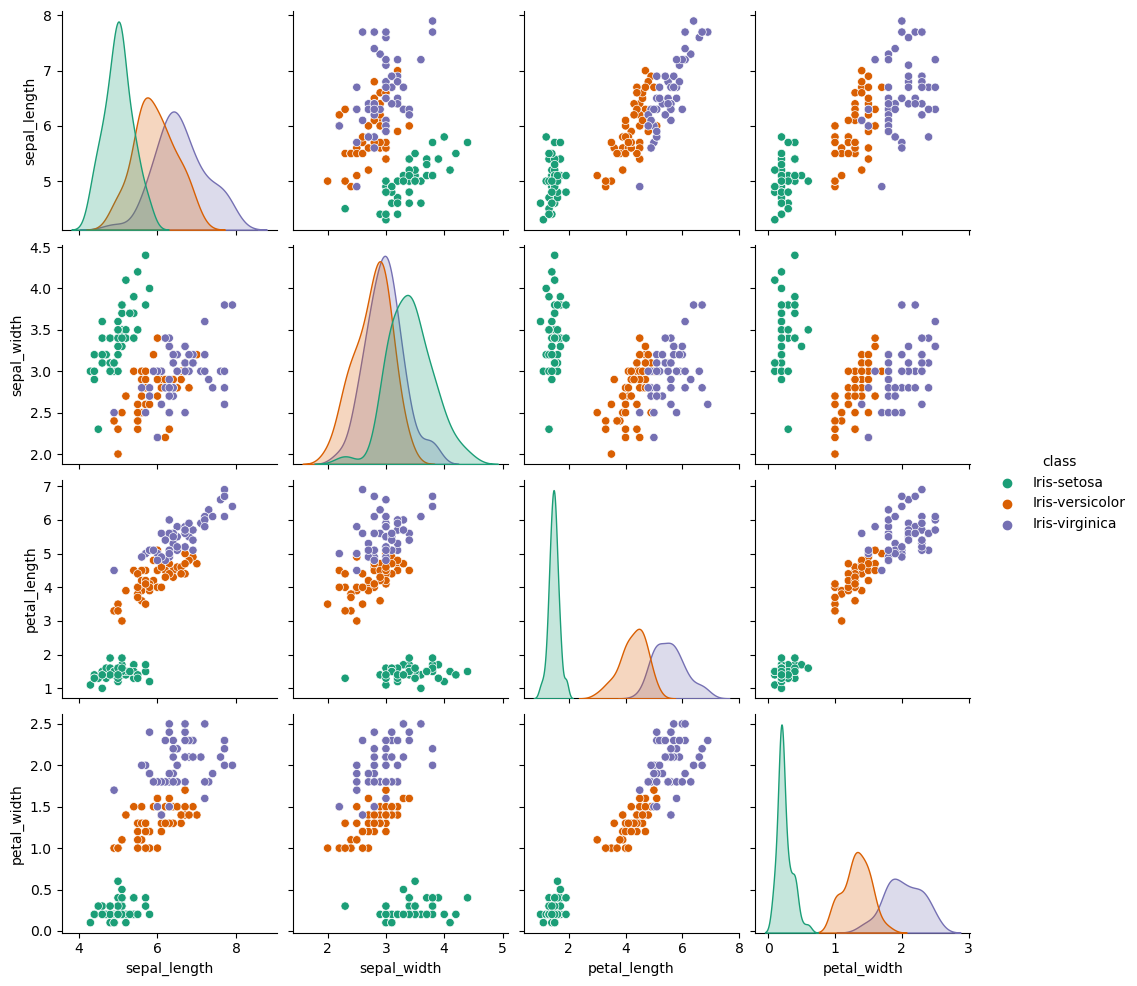

In [25]:
sns.pairplot(iris,hue="class",palette="Dark2")

In [ ]:
#above pic,it shows that setosa is separate with other ,escepically in sepal length,and  sepal width

# Check Kerner density

C:\Users\sarav\AppData\Local\Temp\ipykernel_37096\1239478552.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=setosa["sepal_width"], y=setosa["sepal_length"],shade=True,shade_lowest=False, cmap='plasma')
C:\Users\sarav\AppData\Local\Temp\ipykernel_37096\1239478552.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa["sepal_width"], y=setosa["sepal_length"],shade=True,shade_lowest=False, cmap='plasma')


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

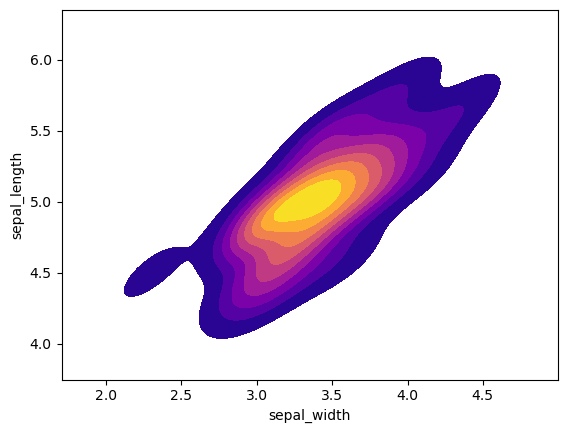

In [43]:
#plot kerner density of sepal length Vs sepal width for setosa flower
setosa=iris[iris["class"]=="Iris-setosa"]
sns.kdeplot(x=setosa["sepal_width"], y=setosa["sepal_length"],shade=True,shade_lowest=False, cmap='plasma')
#sns.kdeplot ( setosa["sepal_width"] , setosa["sepal_length"],cmap="plasma",shade=True,shade_lowest=False)

In [44]:
#standardizing the variable
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
#we drop class since it is categorical variable while fitting
scaler.fit(iris.drop("class",axis=1))

StandardScaler()

In [48]:
scaled_features=scaler.transform(iris.drop("class",axis=1))

In [49]:
#convert to dataframe
iris_feat=pd.DataFrame(scaled_features,columns=iris.columns[:-1])
iris_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [50]:
#now above one shows that the values are normally distributed

# splitting data into train and Test

In [51]:
#Spltting to train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(scaled_features,iris["class"],test_size=0.3,random_state=103)

# Using KNN

In [52]:
#import knearest neighbourclassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)#taking k value is 1-->n_neighbors=1

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred=knn.predict(X_test)
pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [56]:
#lets evaluate the prediction
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))

[[14  0  0]
 [ 0 13  0]
 [ 0  2 16]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
#in confusion matris-->just 2 mispoints
#auurancy is 96%

# Choose best value of K

In [57]:
error_rate=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=Y_test))

Text(0, 0.5, 'Error_Rate')

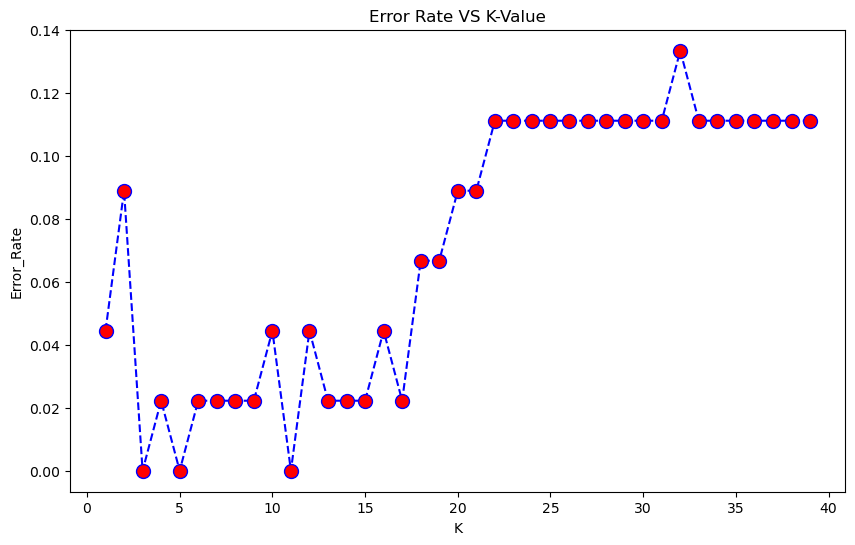

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate VS K-Value")
plt.xlabel("K")
plt.ylabel("Error_Rate")

In [ ]:
#here it shows error  is minimum when K is 3,5,11

In [62]:
print("When k ia 3")
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print("\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))

When k ia 3


[[14  0  0]
 [ 0 13  0]
 [ 0  0 18]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [63]:
print("When k ia 5")
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print("\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))

When k ia 5


[[14  0  0]
 [ 0 13  0]
 [ 0  0 18]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [64]:
print("When k ia 11")
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print("\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))

When k ia 11


[[14  0  0]
 [ 0 13  0]
 [ 0  0 18]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [65]:
#now accurancy is 100%